##  Carlson Exercise 10-1: Create a linear regression

### Get the data

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [74]:
fish = pd.read_csv('Fish.csv')

In [76]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Clean the data

In [85]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish = fish.rename(columns={'Length1': 'VLen', 'Length2': 'DLen', 'Length3':'CLen'})

In [81]:
print(fish)

    Species  Weight  VLen  DLen  CLen   Height   Width
0     Bream   242.0  23.2  25.4  30.0  11.5200  4.0200
1     Bream   290.0  24.0  26.3  31.2  12.4800  4.3056
2     Bream   340.0  23.9  26.5  31.1  12.3778  4.6961
3     Bream   363.0  26.3  29.0  33.5  12.7300  4.4555
4     Bream   430.0  26.5  29.0  34.0  12.4440  5.1340
..      ...     ...   ...   ...   ...      ...     ...
154   Smelt    12.2  11.5  12.2  13.4   2.0904  1.3936
155   Smelt    13.4  11.7  12.4  13.5   2.4300  1.2690
156   Smelt    12.2  12.1  13.0  13.8   2.2770  1.2558
157   Smelt    19.7  13.2  14.3  15.2   2.8728  2.0672
158   Smelt    19.9  13.8  15.0  16.2   2.9322  1.8792

[159 rows x 7 columns]


In [83]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   VLen     159 non-null    float64
 3   DLen     159 non-null    float64
 4   CLen     159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Examine relationships in the data and identify correlations

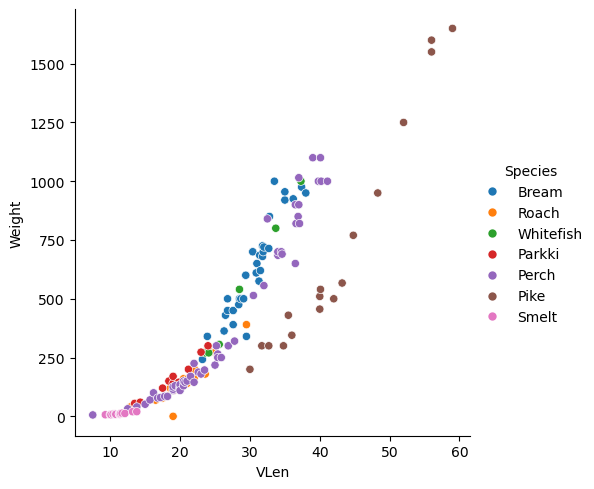

In [91]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish, x='VLen', y='Weight', hue ='Species')
#plt.yscale('log')
#plt.show()

### This is crazy!!  There are several species of fish with different length-weight relationships.  We will select pike

In [100]:
pike_data = fish[fish['Species'] == 'Pike']
pike_data.head()

,Species,Weight,VLen,DLen,CLen,Height,Width
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765


### Perform a logit transform on the weight data and create a new column

In [139]:
pike_data.describe()

,Weight,VLen,DLen,CLen,Height,Width,logit_wt
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,14.000000
mean,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382,-0.657105
std,494.140765,9.029087,9.714116,10.167426,1.664228,1.140269,0.902672
min,200.000000,30.000000,32.300000,34.800000,5.568000,3.375600,-1.871802
25%,345.000000,35.500000,38.000000,40.500000,6.396000,4.322500,-1.341799
50%,510.000000,40.100000,43.000000,45.800000,7.290000,4.870000,-0.760735
75%,950.000000,48.300000,51.700000,55.100000,8.926200,6.144000,-0.517375
max,1650.000000,59.000000,63.400000,68.000000,10.812000,7.480000,1.609438


In [143]:
# First we filter out rows where 'Weight' is 0 or 1
pike_data = pike_data[(pike_data['Weight'] > 0.0)]

In [145]:
pike_data['logit_wt'] = np.log(pike_data['Weight'] / (1650- pike_data['Weight']))
pike_data.head()

,Species,Weight,VLen,DLen,CLen,Height,Width,logit_wt
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756,-1.981001
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580,-1.504077
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844,-1.504077
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198,-1.504077
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765,-1.042821


### Now we can graph the logit-transformed weight data for pike

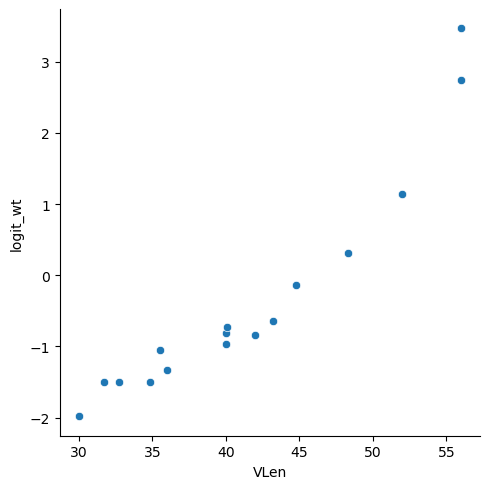

In [152]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=pike_data, x='VLen', y='logit_wt')
plt.show()

In [158]:
# get the correlation data for the Weight column
pike_corr_matrix = pike_data.select_dtypes(include='number').corr()
print(pike_corr_matrix)

            Weight      VLen      DLen      CLen    Height     Width  logit_wt
Weight    1.000000  0.971992  0.974074  0.979019  0.936475  0.919733  0.988343
VLen      0.971992  1.000000  0.999850  0.998547  0.953398  0.932718  0.941955
DLen      0.974074  0.999850  1.000000  0.998914  0.955495  0.936194  0.943518
CLen      0.979019  0.998547  0.998914  1.000000  0.953083  0.941442  0.950239
Height    0.936475  0.953398  0.955495  0.953083  1.000000  0.966731  0.867520
Width     0.919733  0.932718  0.936194  0.941442  0.966731  1.000000  0.834223
logit_wt  0.988343  0.941955  0.943518  0.950239  0.867520  0.834223  1.000000


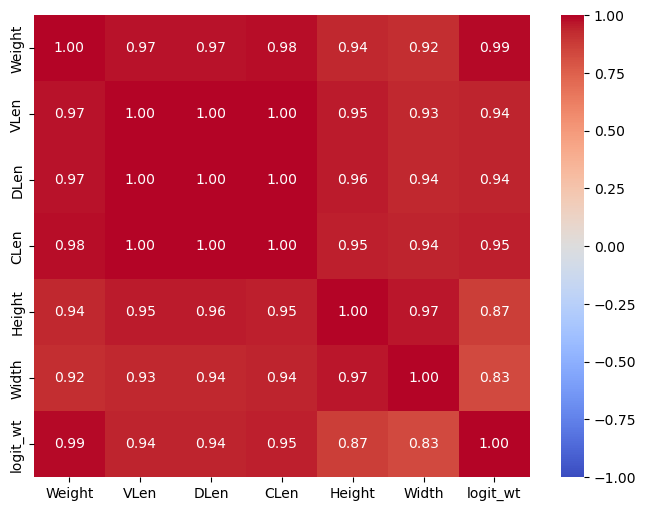

In [160]:
# create a heatmap for the correlation data
plt.figure(figsize=(8, 6)) 
sns.heatmap(pike_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [164]:
# Re-enter fish.csv
fish = pd.read_csv('Fish.csv')

In [176]:
# create the same scatterplot as the previous cell, but only display data for the Perch species
perch_data = fish[fish['Species'] == 'Perch']
perch_data['ln_wt'] = np.log(perch_data['Weight'])
perch_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 72 to 127
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length1  56 non-null     float64
 3   Length2  56 non-null     float64
 4   Length3  56 non-null     float64
 5   Height   56 non-null     float64
 6   Width    56 non-null     float64
 7   ln_wt    56 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.9+ KB


C:\Users\carls\AppData\Local\Temp\ipykernel_16268\4265307444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch_data['ln_wt'] = np.log(perch_data['Weight'])


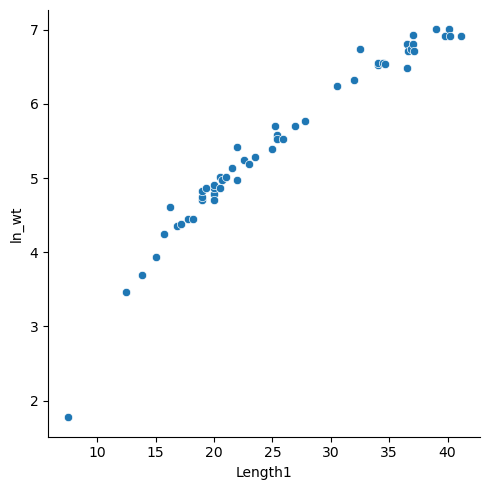

In [182]:
# use a scatterplot to plot the correlation between weight and vertical length for Perch
sns.relplot(data=perch_data, x='Length1', y='ln_wt')
#plt.yscale('log')
#plt.show()

### Remove outliers

In [210]:
perch_data = perch_data[perch_data['ln_wt'] > 3]

### Create a linear model

In [213]:
# split the training and testing data
from sklearn.model_selection import train_test_split
X = perch_data[['Length1']]  # Features (independent variable)
y = perch_data['ln_wt']      # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [215]:
# create the model and fit the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [217]:
# Train the model on the training data and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [219]:
# score the testing data
r2_score = model.score(X_test, y_test)
print(f'R-squared score: {r2_score}')

R-squared score: 0.9822454642603731


array([5.44793009, 4.41439864, 5.44793009, 4.79896848, 4.85905752,
       6.85401357, 6.54155057, 5.15950271, 6.78190672, 4.71484383,
       7.21454779, 4.28220276, 5.50801913, 5.6281972 , 4.58264795,
       4.79896848, 4.46246987, 4.3422918 , 6.84199576, 5.21959175,
       6.82997795, 6.79392453, 7.2265656 , 4.79896848, 4.67879041,
       4.79896848, 5.03932463, 5.44793009])

In [225]:
yval_pred_data = pd.DataFrame(yval_pred, columns=['ln_wt_pred'])

In [235]:
all_perch_data = yval_pred_data.join([X_test.reset_index(drop=True), y_test.reset_index(drop=True)])
all_perch_data = all_perch_data.sort_values(by='Length1')
all_perch_data

,ln_wt_pred,Length1,ln_wt
11,4.282203,15.7,4.248495
17,4.342292,16.2,4.605170
1,4.414399,16.8,4.356709
16,4.462470,17.2,4.382027
14,4.582648,18.2,4.442651
24,4.678790,19.0,4.700480
9,4.714844,19.3,4.867534
25,4.798968,20.0,4.905275
3,4.798968,20.0,4.787492
23,4.798968,20.0,4.867534


### Plot the regression line

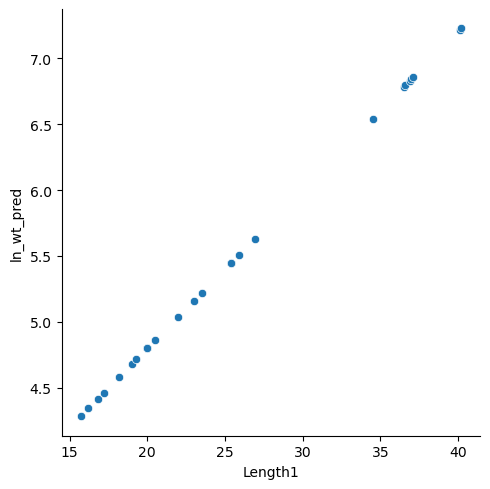

In [239]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=all_perch_data, x='Length1', y='ln_wt_pred')
#plt.yscale('log')
#plt.show()

In [ ]:
# join the predicted data with the original data

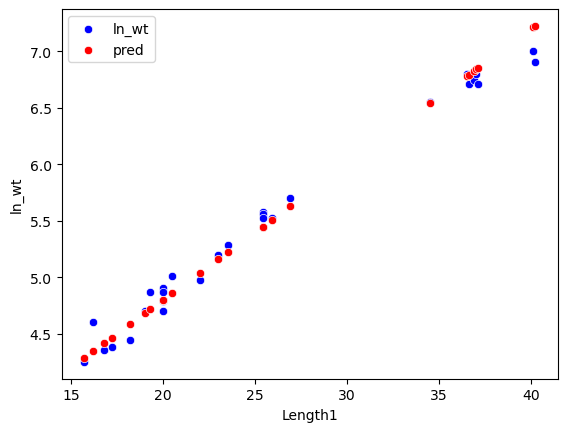

In [241]:
sns.scatterplot(data=all_perch_data, x='Length1', y='ln_wt', color='blue', label='ln_wt')
sns.scatterplot(data=all_perch_data, x='Length1', y='ln_wt_pred', color='red', label='pred')
plt.legend()
plt.show()

## Plot the residuals

In [251]:
# calculate the residuals and store them in a column
#all_perch_data['residual'] = all_perch_data['ln_wt_pred'] - all_perch_data['ln_wt']
all_perch_data['residual'] = all_perch_data.ln_wt_pred - all_perch_data.ln_wt
all_perch_data.head()

,ln_wt_pred,Length1,ln_wt,residual
11,4.282203,15.7,4.248495,0.033708
17,4.342292,16.2,4.605170,-0.262878
1,4.414399,16.8,4.356709,0.057690
16,4.462470,17.2,4.382027,0.080443
14,4.582648,18.2,4.442651,0.139997


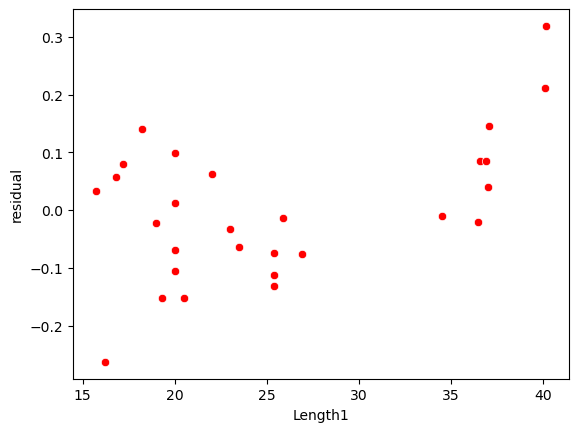

In [259]:
# use relplot() to create a scatterplot for the residuals
sns.scatterplot(data=all_perch_data, x='Length1', y='residual', color='red')
#for ax in g.axes.flat:
#    ax.axhline(0, ls='--')
plt.show()